In [1]:
import torch
from torch import nn, optim
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from tqdm import tqdm

In [2]:
torch.cuda.is_available()

False

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
train_set = datasets.CIFAR10(root='./data', download=True, train=True, transform=transform)
test_set = datasets.CIFAR10(root='./data', download=True, train=False, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
print('number of training set :', len(train_set))
print('number of test set :', len(test_set))

number of training set : 50000
number of test set : 10000


In [12]:
train_loader = DataLoader(dataset = train_set, batch_size=50, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset = test_set, batch_size=50, shuffle=True, num_workers=2)

In [28]:
class NewModel(nn.Module):
    def __init__(self, D_in, H_1, H_2, H_3, D_out):
        super(NewModel, self).__init__()
        self.layer1 = nn.Linear(D_in, H_1)
        self.layer2 = nn.Linear(H_1, H_2)
        self.layer3 = nn.Linear(H_2, H_3)
        self.layer4 = nn.Linear(H_3, D_out)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.layer4(x)
        return x

In [14]:
train_iter = iter(train_loader)
image, label = train_iter.next()
image.shape

torch.Size([50, 3, 32, 32])

In [29]:
model = NewModel(32*32*3, 240, 125, 64, 10)

In [30]:
running_loss_history = []
running_correct_history = []
valid_loss_history = []
valid_correct_history = []

In [31]:
criterion = nn.CrossEntropyLoss()

In [32]:
optimizer = optim.Adam(params=model.parameters(), lr = 0.001)

In [33]:
epoch = 12
for i in tqdm(range(epoch)):
    
    running_loss, valid_loss = 0.0, 0.0
    running_correct, valid_correct = 0.0, 0.0

    for train_input, train_label in train_loader:
        train_input = train_input.view(train_input.shape[0], -1)
        train_output = model.forward(train_input)
        # caculating loss
        loss = criterion(train_output, train_label)
        # initialize gradient
        optimizer.zero_grad()
        # backpropagation
        loss.backward()
        # update weight
        optimizer.step()
        _, running_pred = torch.max(train_output, 1)
        # get total loss, total correction in one epoch
        running_loss += loss.item()
        running_correct += torch.sum(running_pred == train_label.data)
    
    avg_running_loss = running_loss/len(train_loader)
    running_loss_history.append(avg_running_loss)

    avg_running_correct = running_correct/len(train_loader)
    running_correct_history.append(avg_running_correct)

    with torch.no_grad():
        for valid_input, valid_label in test_loader:
            valid_input = valid_input.view(valid_input.shape[0], -1)
            valid_output = model(valid_input)
            v_loss = criterion(valid_output, valid_label)
            _, valid_pred = torch.max(valid_output, 1)

            valid_loss += v_loss.item()
            valid_correct += torch.sum(valid_pred == valid_label.data)

        avg_valid_loss = valid_loss/len(test_loader)
        valid_loss_history.append(avg_valid_loss)

        avg_valid_correct = valid_correct/len(test_loader)
        valid_correct_history.append(avg_valid_correct)
    
    print('{0} epoch / train_loss : {1:.7f}, train_score : {2:.7f}, valid_loss : {3:.7f}, valid_score : {4:.7f}'.format(i+1, avg_running_loss, avg_running_correct, avg_valid_loss, avg_valid_correct))


  8%|██████▉                                                                            | 1/12 [00:18<03:27, 18.90s/it]

1 epoch / train_loss : 1.6560101, train_score : 20.5340004, valid_loss : 1.5003944, valid_score : 23.5550003



 17%|█████████████▊                                                                     | 2/12 [00:38<03:10, 19.02s/it]

2 epoch / train_loss : 1.4420790, train_score : 24.5879993, valid_loss : 1.4333233, valid_score : 25.2099991



 25%|████████████████████▊                                                              | 3/12 [00:57<02:51, 19.06s/it]

3 epoch / train_loss : 1.3361039, train_score : 26.4880009, valid_loss : 1.3591628, valid_score : 26.0149994



 33%|███████████████████████████▋                                                       | 4/12 [01:16<02:33, 19.24s/it]

4 epoch / train_loss : 1.2504265, train_score : 27.9580002, valid_loss : 1.3671460, valid_score : 25.9950008



 42%|██████████████████████████████████▌                                                | 5/12 [01:35<02:14, 19.24s/it]

5 epoch / train_loss : 1.1807034, train_score : 29.1130009, valid_loss : 1.3500409, valid_score : 26.7350006



 50%|█████████████████████████████████████████▌                                         | 6/12 [01:54<01:54, 19.16s/it]

6 epoch / train_loss : 1.1159534, train_score : 30.2150002, valid_loss : 1.3764688, valid_score : 26.5100002



 58%|████████████████████████████████████████████████▍                                  | 7/12 [02:14<01:35, 19.16s/it]

7 epoch / train_loss : 1.0566204, train_score : 31.2430000, valid_loss : 1.3402088, valid_score : 26.9500008



 67%|███████████████████████████████████████████████████████▎                           | 8/12 [02:33<01:16, 19.18s/it]

8 epoch / train_loss : 1.0012941, train_score : 32.1150017, valid_loss : 1.3756384, valid_score : 26.6949997



 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [02:52<00:57, 19.25s/it]

9 epoch / train_loss : 0.9531477, train_score : 32.9799995, valid_loss : 1.4031681, valid_score : 27.1550007



 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [03:11<00:38, 19.20s/it]

10 epoch / train_loss : 0.8987771, train_score : 33.8790016, valid_loss : 1.4443576, valid_score : 26.7350006



 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [03:30<00:19, 19.21s/it]

11 epoch / train_loss : 0.8502778, train_score : 34.8429985, valid_loss : 1.4578679, valid_score : 26.9699993



100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [03:50<00:00, 19.17s/it]

12 epoch / train_loss : 0.8120222, train_score : 35.5070000, valid_loss : 1.4733335, valid_score : 27.1399994


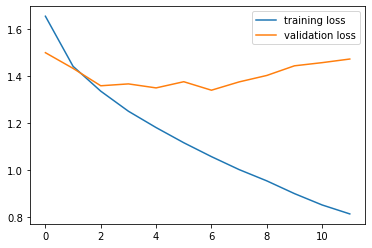

In [35]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(valid_loss_history, label = 'validation loss')
plt.legend()

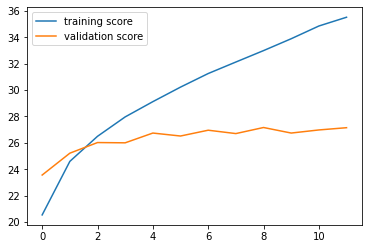

In [36]:
plt.plot(running_correct_history, label = 'training score')
plt.plot(valid_correct_history, label = 'validation score')
plt.legend()

In [ ]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [ ]:
is_cuda

In [ ]:
device

In [ ]:
model = model.to(device)

In [ ]:
optimizer2 = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
epoch = 12
for i in tqdm(range(epoch)):
    
    running_loss, valid_loss = 0.0, 0.0
    running_correct, valid_correct = 0.0, 0.0

    for train_input, train_label in train_loader:
        train_input, train_label = train_input.to(device), train_label.to(device)
        train_input = train_input.view(train_input.shape[0], -1)
        train_output = model.forward(train_input)
        # caculating loss
        loss = criterion(train_output, train_label)
        # initialize gradient
        optimizer2.zero_grad()
        # backpropagation
        loss.backward()
        # update weight
        optimizer2.step()
        _, running_pred = torch.max(train_output, 1)
        # get total loss, total correction in one epoch
        running_loss += loss.item()
        running_correct += torch.sum(running_pred == train_label.data)
    
    avg_running_loss = running_loss/len(train_loader)
    running_loss_history.append(avg_running_loss)

    avg_running_correct = running_correct/len(train_loader)
    running_correct_history.append(avg_running_correct)

    with torch.no_grad():
        for valid_input, valid_label in test_loader:
            valid_input, valid_label = valid_input.to(device), valid_label.to(device)
            valid_input = valid_input.view(valid_input.shape[0], -1)
            valid_output = model(valid_input)
            v_loss = criterion(valid_output, valid_label)
            _, valid_pred = torch.max(valid_output, 1)

            valid_loss += v_loss.item()
            valid_correct += torch.sum(valid_pred == valid_label.data)

        avg_valid_loss = valid_loss/len(test_loader)
        valid_loss_history.append(avg_valid_loss)

        avg_valid_correct = valid_correct/len(test_loader)
        valid_correct_history.append(avg_valid_correct)
    
    print('{0} epoch / train_loss : {1:.7f}, train_score : {2:.7f}, valid_loss : {3:.7f}, valid_score : {4:.7f}'.format(i+1, avg_running_loss, avg_running_correct, avg_valid_loss, avg_valid_correct))

In [ ]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(valid_loss_history, label = 'validation loss')
plt.legend()

In [ ]:
plt.plot(running_correct_history, label = 'training score')
plt.plot(valid_correct_history, label = 'validation score')
plt.legend()

In [ ]:
torch.cuda.current_device()

In [ ]:
torch.cuda.device_count()

In [ ]:
torch.cuda.get_device_name(0)

In [ ]:
torch.cuda.get_device_capability(0)

In [70]:
def make_ndarray(target_list, each_size) :
    # 784 means bitmap size
    data = np.empty((len(target_list)*each_size, 784))
    target = np.empty((len(target_list)*each_size))
    for label, filename in enumerate(target_list) :
        npy = np.load('./{}.npy'.format(filename))
        tmp = np.arange(npy.shape[0])
        idx = np.random.choice(tmp, each_size, replace=False)
        data[label*each_size:(label+1)*each_size] = npy[idx]
        target[label*each_size:(label+1)*each_size] = label
        print('{} is Complete'.format(filename))
    s_idx = np.arange(target.shape[0])
    np.random.shuffle(s_idx)
    data = data[s_idx]
    target = target[s_idx]
    print('result shape : {0} & {1}'.format(data.shape, target.shape))
    return data, target

target_list = ['ant', 'bicycle', 'bird', 'butterfly', 'camel', 'clock', 'cow', 'diamond']
data, target = make_ndarray(target_list=target_list, each_size=10000)

ant is Complete
bicycle is Complete
bird is Complete
butterfly is Complete
camel is Complete
clock is Complete
cow is Complete
diamond is Complete
result shape : (80000, 784) & (80000,)


In [71]:
# data = torch.Tensor(data).float()
type(data)

numpy.ndarray

In [72]:
# target = torch.Tensor(target).float()
type(target)

numpy.ndarray

In [57]:
class Custom_Dataset(Dataset):
    
    def __init__(self, file_list, each_size = 10000, transform = None):
        self.file_list = file_list
        self.transform = transform
        self.data_len = each_size*len(file_list)
        self.data = 
    
    def __len__(self):
        return self.data_len
        
    def __getitem__(self, idx):
        return self.data[idx]

In [77]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(data)
data_scaled = std_scaler.transform(data)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.50986249e-02, -4.74331975e-02, -6.92232569e-02,
       -9.30600482e-02, -1.16966903e-01, -1.37029214e-01, -1.56637242e-01,
       -1.77539744e-01, -2.00796350e-01, -2.24978638e-01,  1.41184753e-01,
        4.21084714e+00,  4.27193595e+00,  4.47989908e+00,  4.09906534e+00,
        3.20043353e+00,  1.02683535e+00, -2.25481320e-01, -2.03928461e-01,
       -1.84805921e-01, -1.66271040e-01, -1.44405252e-01, -1.20377475e-01,
       -9.39051476e-02, -

In [172]:
X = torch.Tensor(data_scaled)
y = torch.Tensor(target).long()

In [173]:
print(type(X))
print(type(y))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [175]:
from torch.utils.data import TensorDataset

In [176]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

In [177]:
train_loader = DataLoader(train_data, batch_size = 100, shuffle = True, num_workers = 2)
test_loader = DataLoader(test_data, batch_size = 100, shuffle = True, num_workers = 2)

In [178]:
dataiter = iter(train_loader)
batch_image, batch_label = dataiter.next()
batch_image.shape

torch.Size([100, 784])

In [107]:
temp_image = batch_image[3]
temp_label = batch_label[3]

In [108]:
def show_image(img, label) :
    np_img = img.numpy().reshape(28, 28)
    plt.imshow(np_img, cmap = 'binary')
    plt.title(label)

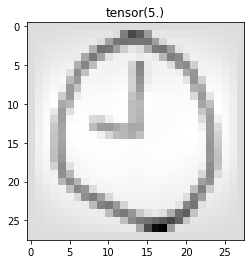

In [109]:
show_image(temp_image, temp_label)

In [220]:
class Quickdraw_model(nn.Module):
    
    def __init__(self, D_in, H_1, H_2, D_out):
        super(Quickdraw_model, self).__init__()
        self.layer1 = nn.Linear(D_in, H_1)
        self.layer2 = nn.Linear(H_1, H_2)
        self.layer3 = nn.Linear(H_2, D_out)
        
    def forward(self, x):
        hidden_1 = F.relu(self.layer1(x))
        hidden_2 = F.relu(self.layer2(hidden_1))
        out_before = self.layer3(hidden_2)
        output = F.softmax(out_before, dim = 1)
        return output

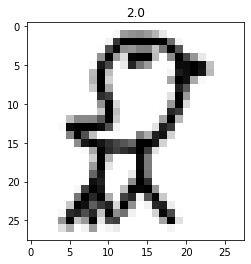

In [205]:
show_image(torch.Tensor(data[0]), target[0])

In [221]:
qd_model = Quickdraw_model(28*28, 125, 64, 8)

In [240]:
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

In [241]:
epoch = 15

In [242]:
criterion = nn.CrossEntropyLoss()

In [247]:
optimizer = optim.Adam(qd_model.parameters(), lr = 0.0005)

In [248]:
for i in range(epoch) :
    
    train_loss, test_loss = 0.0, 0.0
    train_accuracy, test_accuracy = 0.0, 0.0
    
    for train_image, train_label in train_loader:
        train_output = qd_model.forward(train_image)
        # Get batch loss
        t_loss = criterion(train_output, train_label)
        # Initializing weight
        optimizer.zero_grad()
        # Backpropagation
        t_loss.backward()
        # Update weight
        optimizer.step()
        _, t_pred = torch.max(train_output, 1)
        
        train_loss += t_loss.item()
        train_accuracy += torch.sum(t_pred==train_label.data)
        
    avg_train_loss = train_loss/len(train_loader)
    train_loss_history.append(avg_train_loss)
    
    avg_train_accuracy = train_accuracy/len(train_loader)    
    train_accuracy_history.append(avg_train_accuracy)
    
    with torch.no_grad():
        for test_image, test_label in test_loader:
            test_output = qd_model.forward(test_image)
            v_loss = criterion(test_output, test_label)
            _, v_pred = torch.max(test_output, 1)
            
            test_loss += v_loss.item()
            test_accuracy += torch.sum(v_pred == test_label.data)
        
        avg_test_loss = test_loss/len(test_loader)
        test_loss_history.append(avg_test_loss)
        
        avg_test_accuracy = test_accuracy/len(test_loader)
        test_accuracy_history.append(avg_test_accuracy)
    
    print('loss{0}/ tr_ls : {1:.7f}, tr_ac : {2:.7f}, ts_ls : {3:.7f}, ts_ac : {4:.7f}'.format(i+1, avg_train_loss, avg_train_accuracy, avg_test_loss, avg_test_accuracy))

loss1/ tr_ls : 1.3461501, tr_ac : 92.7843781, ts_ls : 1.4380106, ts_ac : 83.5374985
loss2/ tr_ls : 1.3432241, tr_ac : 93.0718765, ts_ls : 1.4379434, ts_ac : 83.5187531
loss3/ tr_ls : 1.3422827, tr_ac : 93.1624985, ts_ls : 1.4365637, ts_ac : 83.6875000
loss4/ tr_ls : 1.3416283, tr_ac : 93.2312469, ts_ls : 1.4389209, ts_ac : 83.3750000
loss5/ tr_ls : 1.3413006, tr_ac : 93.2609406, ts_ls : 1.4374304, ts_ac : 83.5999985
loss6/ tr_ls : 1.3401232, tr_ac : 93.3843765, ts_ls : 1.4361117, ts_ac : 83.7562485
loss7/ tr_ls : 1.3403174, tr_ac : 93.3625031, ts_ls : 1.4379596, ts_ac : 83.4937515
loss8/ tr_ls : 1.3396394, tr_ac : 93.4328156, ts_ls : 1.4367725, ts_ac : 83.6250000
loss9/ tr_ls : 1.3390902, tr_ac : 93.4968719, ts_ls : 1.4359322, ts_ac : 83.7562485
loss10/ tr_ls : 1.3386119, tr_ac : 93.5343781, ts_ls : 1.4385544, ts_ac : 83.4437485
loss11/ tr_ls : 1.3388957, tr_ac : 93.5000000, ts_ls : 1.4373415, ts_ac : 83.5937500
loss12/ tr_ls : 1.3385066, tr_ac : 93.5500031, ts_ls : 1.4378879, ts_ac : 

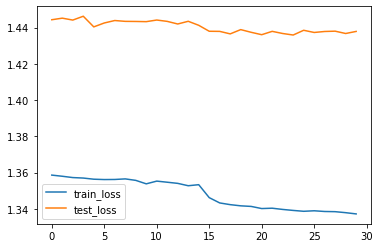

In [249]:
plt.plot(train_loss_history, label = 'train_loss')
plt.plot(test_loss_history, label = 'test_loss')
plt.legend()

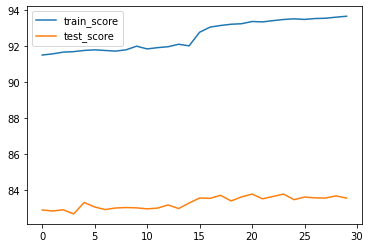

In [250]:
plt.plot(train_accuracy_history, label = 'train_score')
plt.plot(test_accuracy_history, label = 'test_score')
plt.legend()